<a href="https://colab.research.google.com/github/Isuru-rangana/Deep-Learning-Assignment/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DL/hour.csv')

In [4]:
# Convert date and set as index
data['dteday'] = pd.to_datetime(data['dteday'])
data.set_index('dteday', inplace=True)

In [5]:
features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']
target = ['cnt']

X = data[features].values  # Feature matrix
y = data[target].values  # Target variable


In [6]:
# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
data[features] = scaler.fit_transform(data[features])

In [7]:
# Prepare X and y
X = data[features].values
y = data[target].values

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [11]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [12]:
# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr], verbose=1)
end_time = time.time()
training_time = end_time - start_time
print(f"ANN Training Time: {training_time} seconds")


Epoch 1/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51588.1289 - val_loss: 24540.8164 - learning_rate: 0.0010
Epoch 2/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23507.9922 - val_loss: 22830.6406 - learning_rate: 0.0010
Epoch 3/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22677.1758 - val_loss: 21531.2676 - learning_rate: 0.0010
Epoch 4/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22361.4922 - val_loss: 20961.0000 - learning_rate: 0.0010
Epoch 5/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21109.3223 - val_loss: 19661.3730 - learning_rate: 0.0010
Epoch 6/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19570.5078 - val_loss: 18548.8418 - learning_rate: 0.0010
Epoch 7/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 17719.2734 - val_loss: 18149.0039 - learning_rate: 0.0010
Epoch 8/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 18119.0371 - val_loss: 16834.7461 - learning_rate: 0.0010
Epoch 9/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/

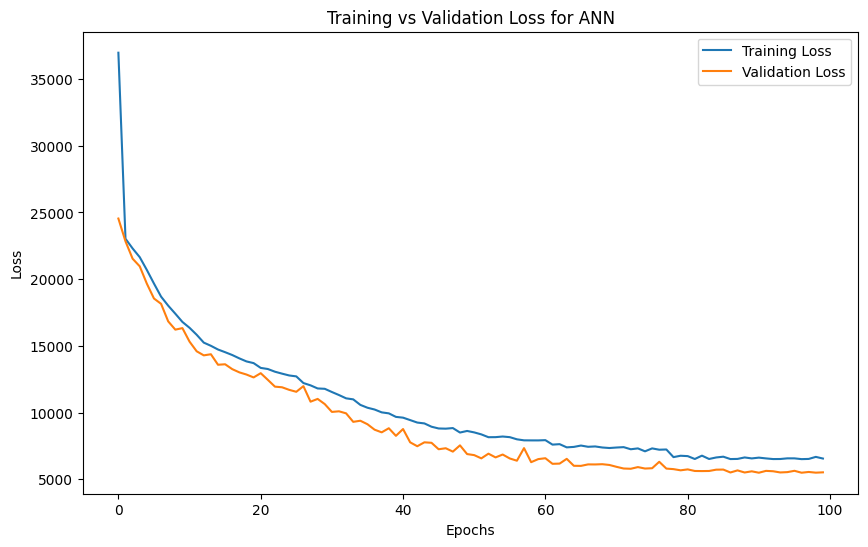

In [13]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss for ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Make predictions
predictions = model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'ANN MSE: {mse}')
print(f'ANN RMSE: {rmse}')
print(f'ANN MAE: {mae}')
print(f'ANN R²: {r2}')

ANN MSE: 5370.949498700484
ANN RMSE: 73.28676209726068
ANN MAE: 49.68823474021446
ANN R²: 0.830384373664856


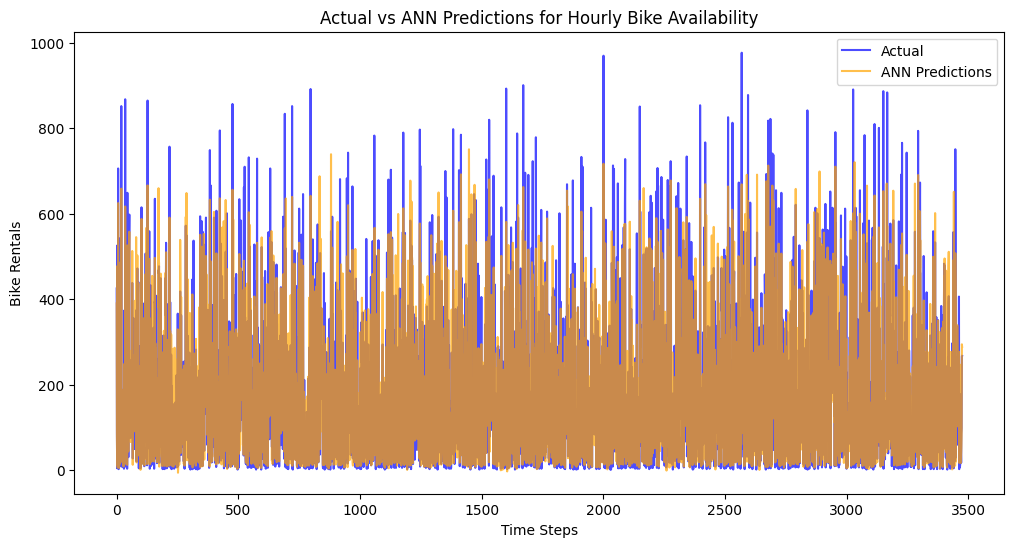

In [16]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', alpha=0.7)
plt.plot(predictions, label='ANN Predictions', color='orange', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Bike Rentals')
plt.title('Actual vs ANN Predictions for Hourly Bike Availability')
plt.legend()
plt.show()